In [15]:
from image_segmentation.model import image_segmentation
from edge_detection.teed.model import edge_detection
from edge_smoothing.model import edge_smoothing
from convert_svg.model import convert_svg
from edge_detection.canny.model import edge_detection as canny_edge
import cv2

# Load
image_path = '../public/bear_fishing.jpg'
with open(image_path, 'rb') as f:
    image_bytes = f.read()

# Hardcoded for now
tl = (1142, 134)  # Top-left corner of the image (adjust based on your image)
br = (1739, 1064)  # Bottom-right corner of the image (adjust based on your image)


In [16]:

segmented_image = image_segmentation(
    image_bytes, tl, br, "image_segmentation/sam_vit_h_4b8939.pth")

In [13]:

edged_image = edge_detection(image_bytes)
other_edged_img = canny_edge(image_bytes)

# Bytes to write to the new file
data = edged_image
print(f'teed: \n {edged_image} \n\n')
print(f'canny: \n {other_edged_img}')

# Open a new file in binary write mode
with open('../public/test.png', 'wb') as f:
    # Write the bytes to the file
    f.write(data)


['bear.png']: torch.Size([1, 3, 1080, 1920])
['image.png']: torch.Size([1, 3, 1080, 1920])
teed: 
 b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x07\x80\x00\x00\x048\x08\x00\x00\x00\x00\xcd\xb8\x9e\x9f\x00\x00 \x00IDATx\x01\xec\xe1\xcbr"\x0b\xa0-H\xfa:\xc3\xb62+\xeb\xff\xff\xc7\x9a\xf4\xe0N\xca\xce\xeaxB\x00\x01\x04\x12R*s\xcb=\xff\xe7\xff\xfd\xbf\xfc\xfa\xf5\xeb\xd7\xaf_\xbf\xbe\xcf\xff\xfe\x9f\xff\xf3\x7f\xe7\xff\xf7?\xff\x9f\xfa\x90"\xf6\xa5&Q1\xaa\x98\xd4\x85\xa0.\xc4\xa0n\xc5\xa2)1\xaa\x93\xd4(&5\x88\xadZ\xc5\xa8.\xc4\xacf\xa9\xb8Q\x0f\xc4\x13u_\\\xa9X\x948\xa0&qV\xb3\xb8U\xb7bT\xab\xa0&1\xaaI\xcd\xe2\xbe\xb8\xa3f1\xab\xe7\xe2\x80"6j\x11\x1b5\x89\x07j\x12\x1b5\xa8Qb\xabQ\xab\xa8I\xec+bP\xa3x\xa8\x06\xb1\xd5\x18\xd5\x95\xb8P\xb3X\xd5"f5(1HC\rj\x11\xc4\xa2\xd4$\x88\x0b\xb5\x88IMBQD\xcc*F\xf5@\xec\xa8\x1bq\xa1\x06\xf1PMbRg1\xa8\x0b\xb1\xa8gj\x14\xa4F\xb1\xaa\x18\xd5(%\xa8AE\xacj\x14\'5\x8b{\x1a\'u\xa5\x06!\xd4(\x1a\xb3\xa6.\xc4\xb5\x9a\xa4VqV\xa3\x8aEP\x1f\x17\xfbj+&\xb5QbV\xc4*\xae5

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   3 255 255]
 [  0   0   0 ...   2   0   1]
 [  0   0   0 ...   0   4   0]]


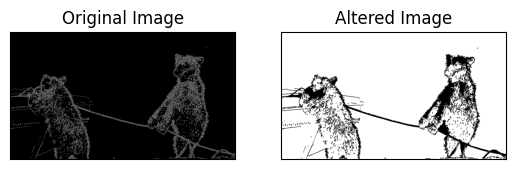

In [14]:

img = cv2.imread('../public/test.png', 0)
print(img)

smoothed_image = edge_smoothing(data)

In [14]:

svg = convert_svg(smoothed_image)

In [9]:

# Save
segmented_image_path = '../public/bear_fishing_output.svg'
with open(segmented_image_path, 'wb') as f:
    f.write(svg)